# SEIRS model

I provide calculations of the SEIRS model used in my seminar given in May 2020 (see [the slides](utapseminar2020.pdf) for mode details). As explained in the slides, the SEIRS is the following set of differential equations

![SEIRS model](img/seirs.jpg)

This model uses the same set of compartments as in the SEIR model, but allows the loss of immunity after some period.

## Time evolution for a fixed $R_0$

First I fix $R_0=3$, $\beta=0.3$ day$^{-1}$, $\alpha=0.2$ day$^{-1}$, $\gamma=0.1$ day$^{-1}$, and $\xi=0.01$ day$^{-1}$, and see the time evolution of `Susceptible`, `Exposed`, `Infectious`, and `Removed`. Initially most people are never infected ($S$) and only 0.01% are exposed ($E$). This can be solved as

Text(0.5, 1.0, 'SEIRS model')

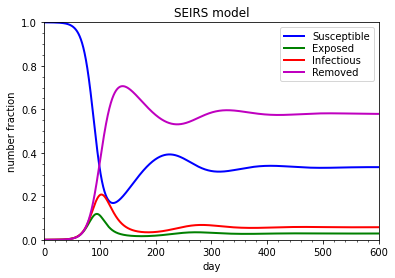

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt

model_name = 'SEIRS model'

# differential equations for [x[0], x[1], x[2], x[3]] = [S, E, I, R]
def eqs_seirs(x, t, beta, alpha, gamma, xi):
    return [(-1.0) * beta * x[0] * x[2] / (x[0] + x[1] + x[2] + x[3]) + xi * x[3], \
            beta * x[0] * x[2] / (x[0] + x[1] + x[2] + x[3]) - alpha * x[1], \
            alpha * x[1] - gamma * x[2], \
            gamma * x[2] - xi * x[3]]

# time step
t_max = 1000
dt = 0.01
times = np.arange(0, t_max, dt)

# initial state
S_0 = 9999
E_0 = 1
I_0 = 0
R_0 = 0
ini_state = [S_0, E_0, I_0, R_0] 
N_0 = S_0 + I_0 + R_0

# solve equations using scipy.integrate
args = (0.3, 0.2, 0.1, 0.01)
result_r030 = odeint(eqs_seirs, ini_state, times, args)

# plotting
xmin = 0.0
xmax = 600.0
ymin = 0.0
ymax = 1.0

plt.plot(times, result_r030[:,0] / N_0, color = 'b', lw = 2)
plt.plot(times, result_r030[:,1] / N_0, color = 'g', lw = 2)
plt.plot(times, result_r030[:,2] / N_0, color = 'r', lw = 2)
plt.plot(times, result_r030[:,3] / N_0, color = 'm', lw = 2)

plt.legend(['Susceptible', 'Exposed', 'Infectious', 'Removed'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('number fraction')
plt.title(model_name)

All converge to non-zero value, which is called **endemic**.

## Dependence on $R_0$

I change $R_0$ to $1.5$, $3$, and $10$ to see how the results change

Text(0.5, 1.0, 'SEIRS model')

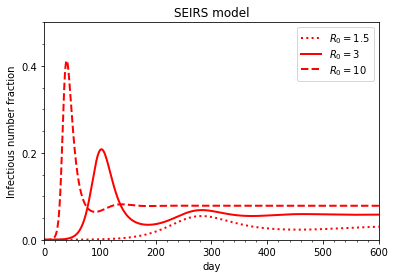

In [2]:
# solve equations using scipy.integrate
args = (0.15, 0.2, 0.1, 0.01)
result_r015 = odeint(eqs_seirs, ini_state, times, args)

args = (1.0, 0.2, 0.1, 0.01)
result_r100 = odeint(eqs_seirs, ini_state, times, args)

# plotting
ymin = 0.0
ymax = 0.5

plt.plot(times, result_r015[:,2] / N_0, ':', color = 'r', lw = 2)
plt.plot(times, result_r030[:,2] / N_0, '-', color = 'r', lw = 2)
plt.plot(times, result_r100[:,2] / N_0, '--', color = 'r', lw = 2)

plt.legend(['$R_0=1.5$','$R_0=3$', '$R_0=10$'], labelspacing = 0.2, numpoints = 1, loc = 'upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100.0))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20.0))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.xlabel('day')
plt.ylabel('Infectious number fraction')
plt.title(model_name)

The converged values are different for different $R_0$.